In [81]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
display:table-cell;
text-align:center;
vertical-align:middle;
}
</style>
""");

### import libraries.


In [82]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore',category=DeprecationWarning)
import pandas as pd
pd.options.display.max_columns=100
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pylab as plot
params = {
    'axes.labelsize': "large",
    'xtick.labelsize': "x-large",
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25,7]
}
plot.rcParams.update(params)

### load data

In [83]:
data=pd.read_csv("D:\\Machine Learning\\titanic\\titanic\\train.csv")
print(data.shape)

(891, 12)


In [84]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Filling null values in Age

In [86]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [87]:
data['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

#### Visualise survival based on gender

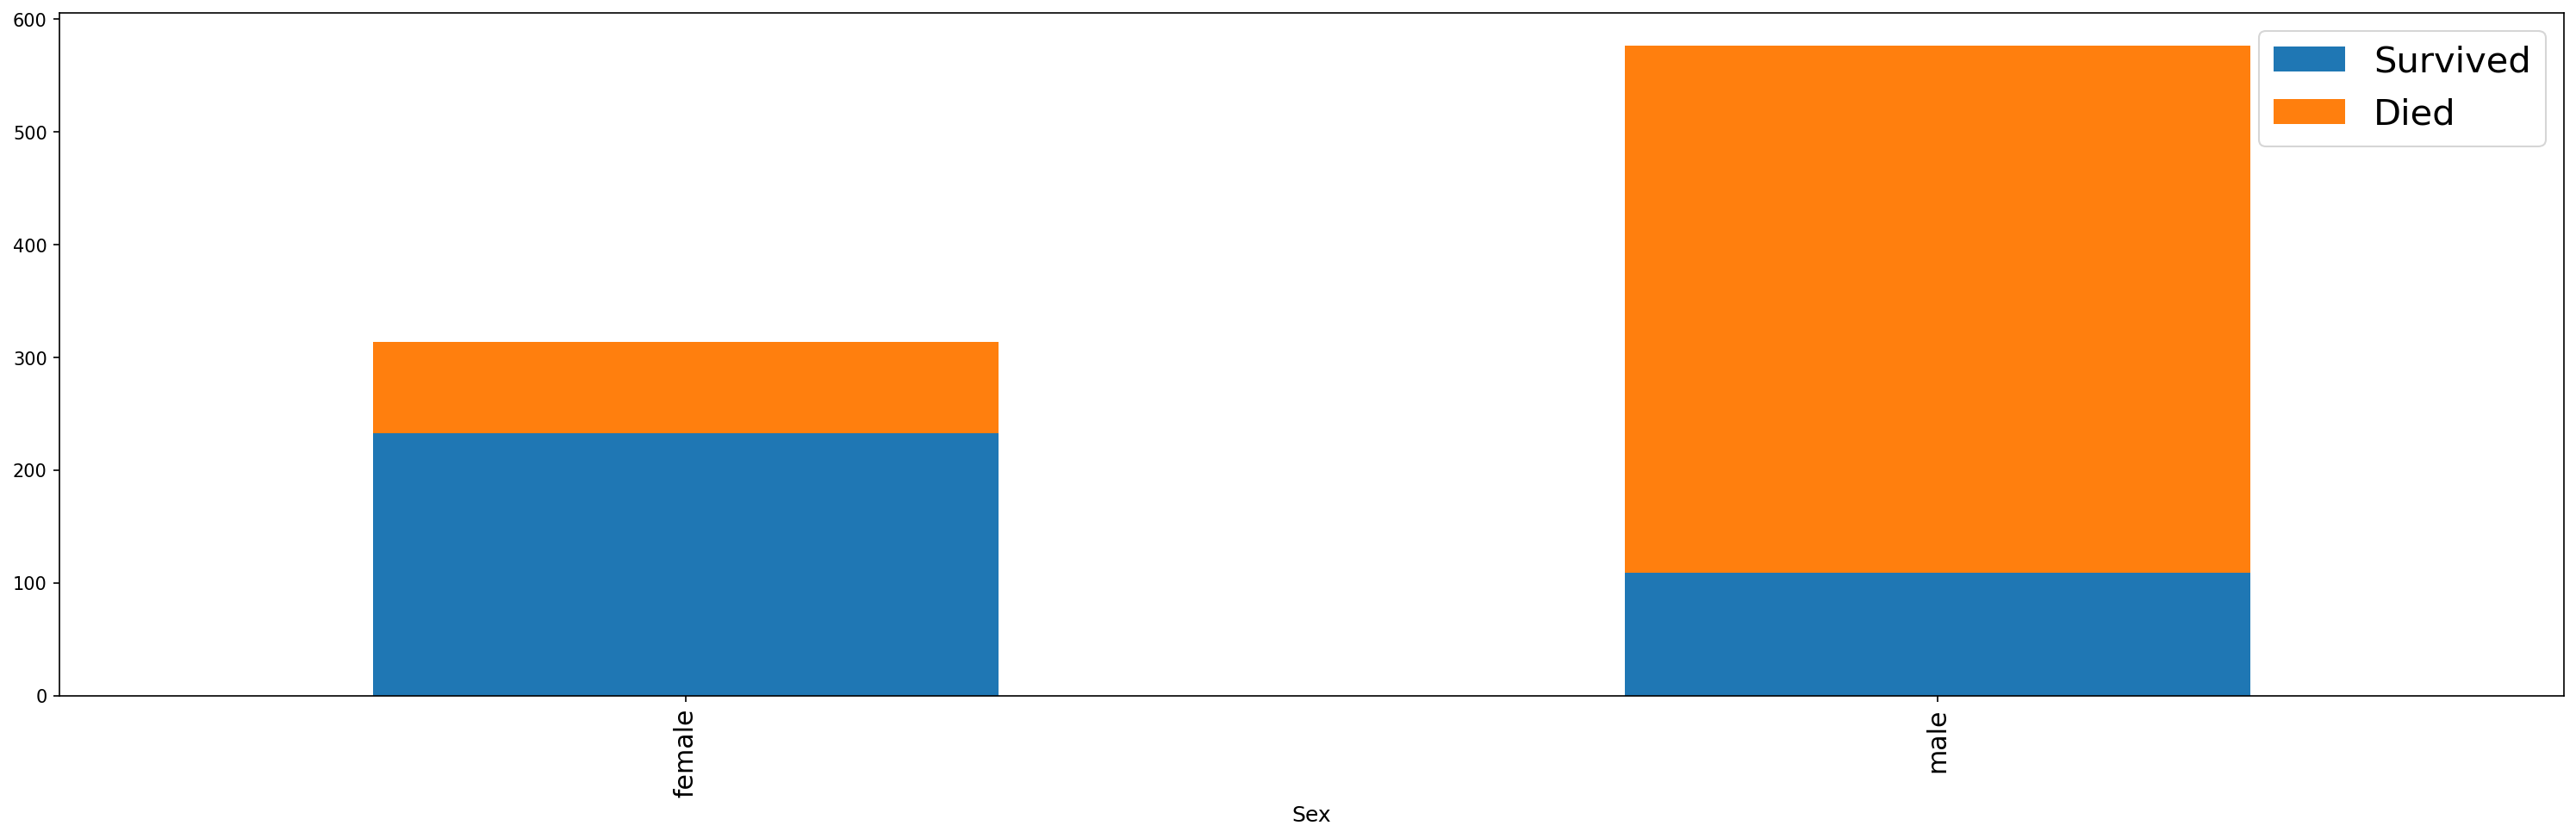

In [88]:
data['Died']=1-data['Survived']
data.groupby('Sex').agg('sum')[['Survived','Died']].plot(kind='bar',figsize=(25,7),stacked=True);

#### Let's plot the same graph with ratio

<AxesSubplot:xlabel='Sex'>

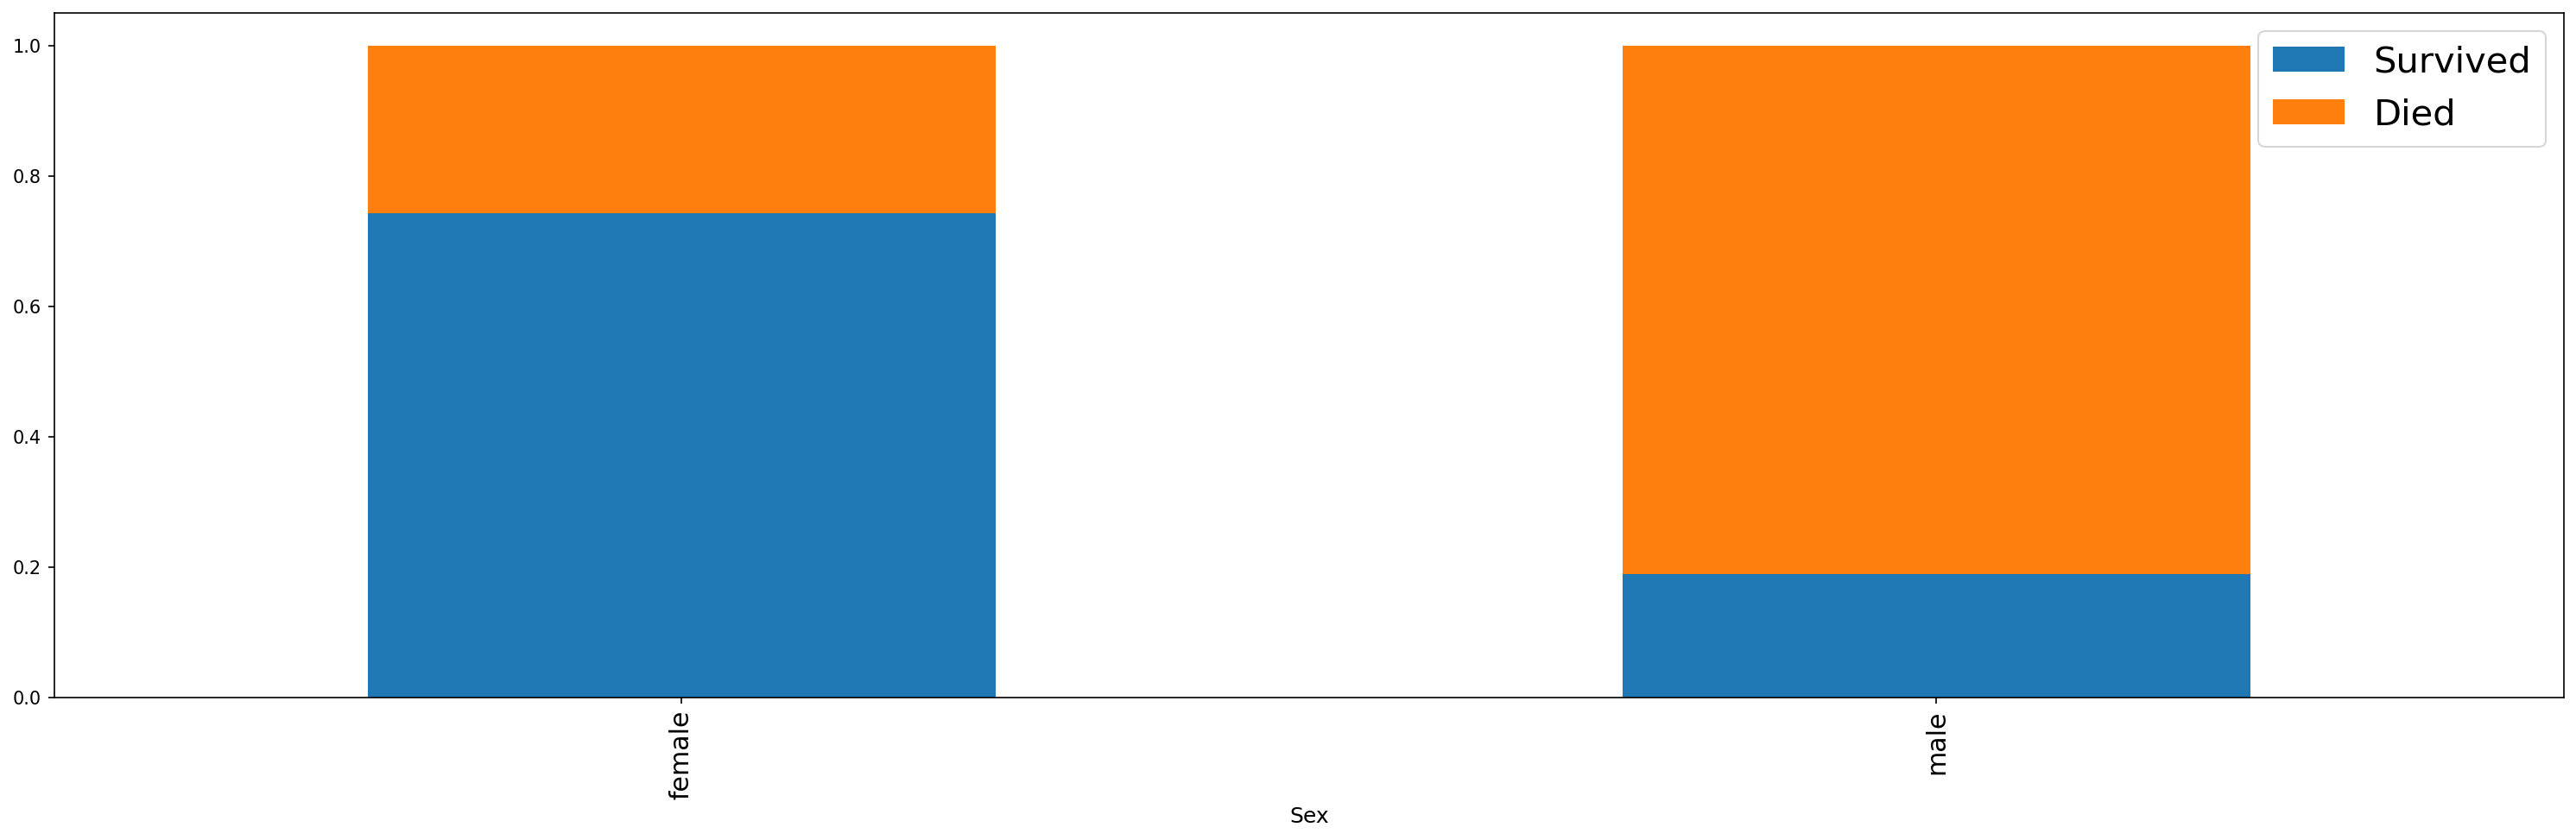

In [89]:
data.groupby('Sex').agg('mean')[['Survived','Died']].plot(kind='bar', figsize=(25,7), stacked=True)

#### Now correlate the survival with the age variable.

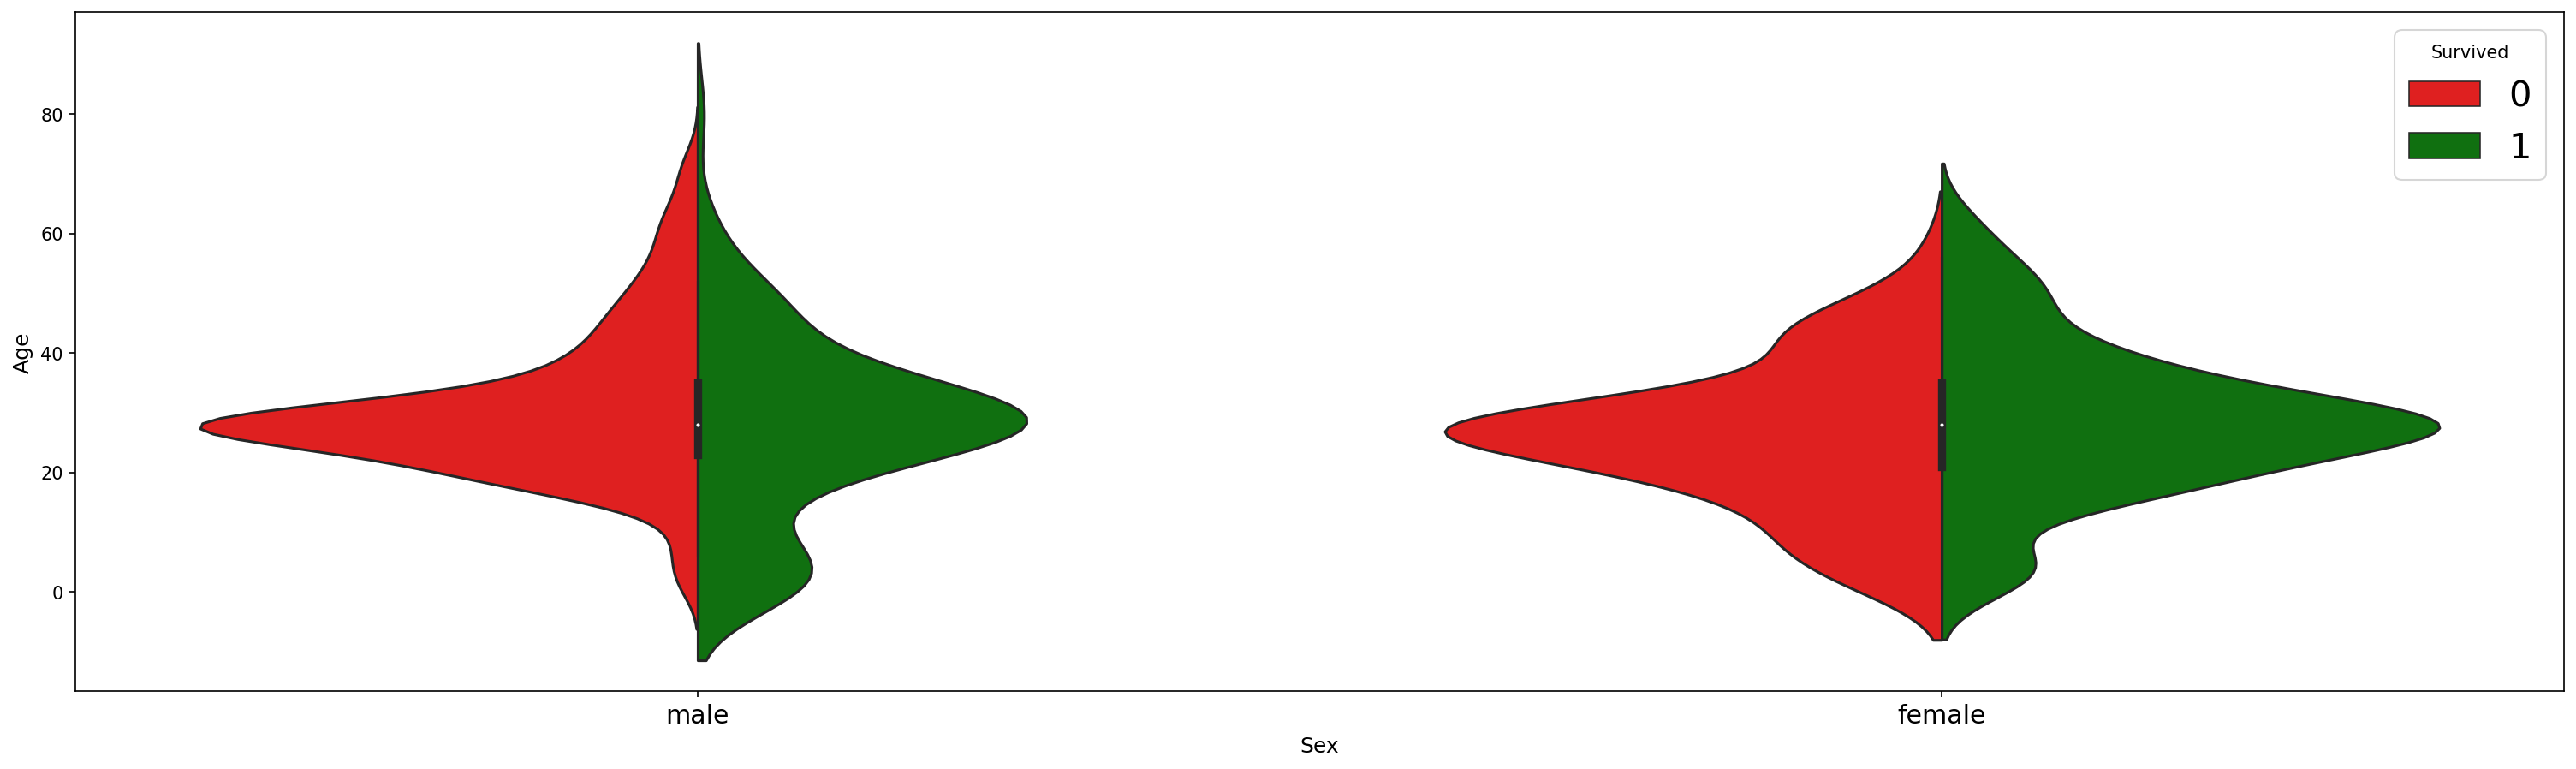

In [90]:
fig=plt.figure(figsize=(25,7))
sns.violinplot(x='Sex',y='Age',hue='Survived',split=True, data=data,palette={0:"r",1:"g"});


#### Now focus on the Fare ticket of each passenger and see how it could impact the survival.

Text(0, 0.5, 'Number of Passengers')

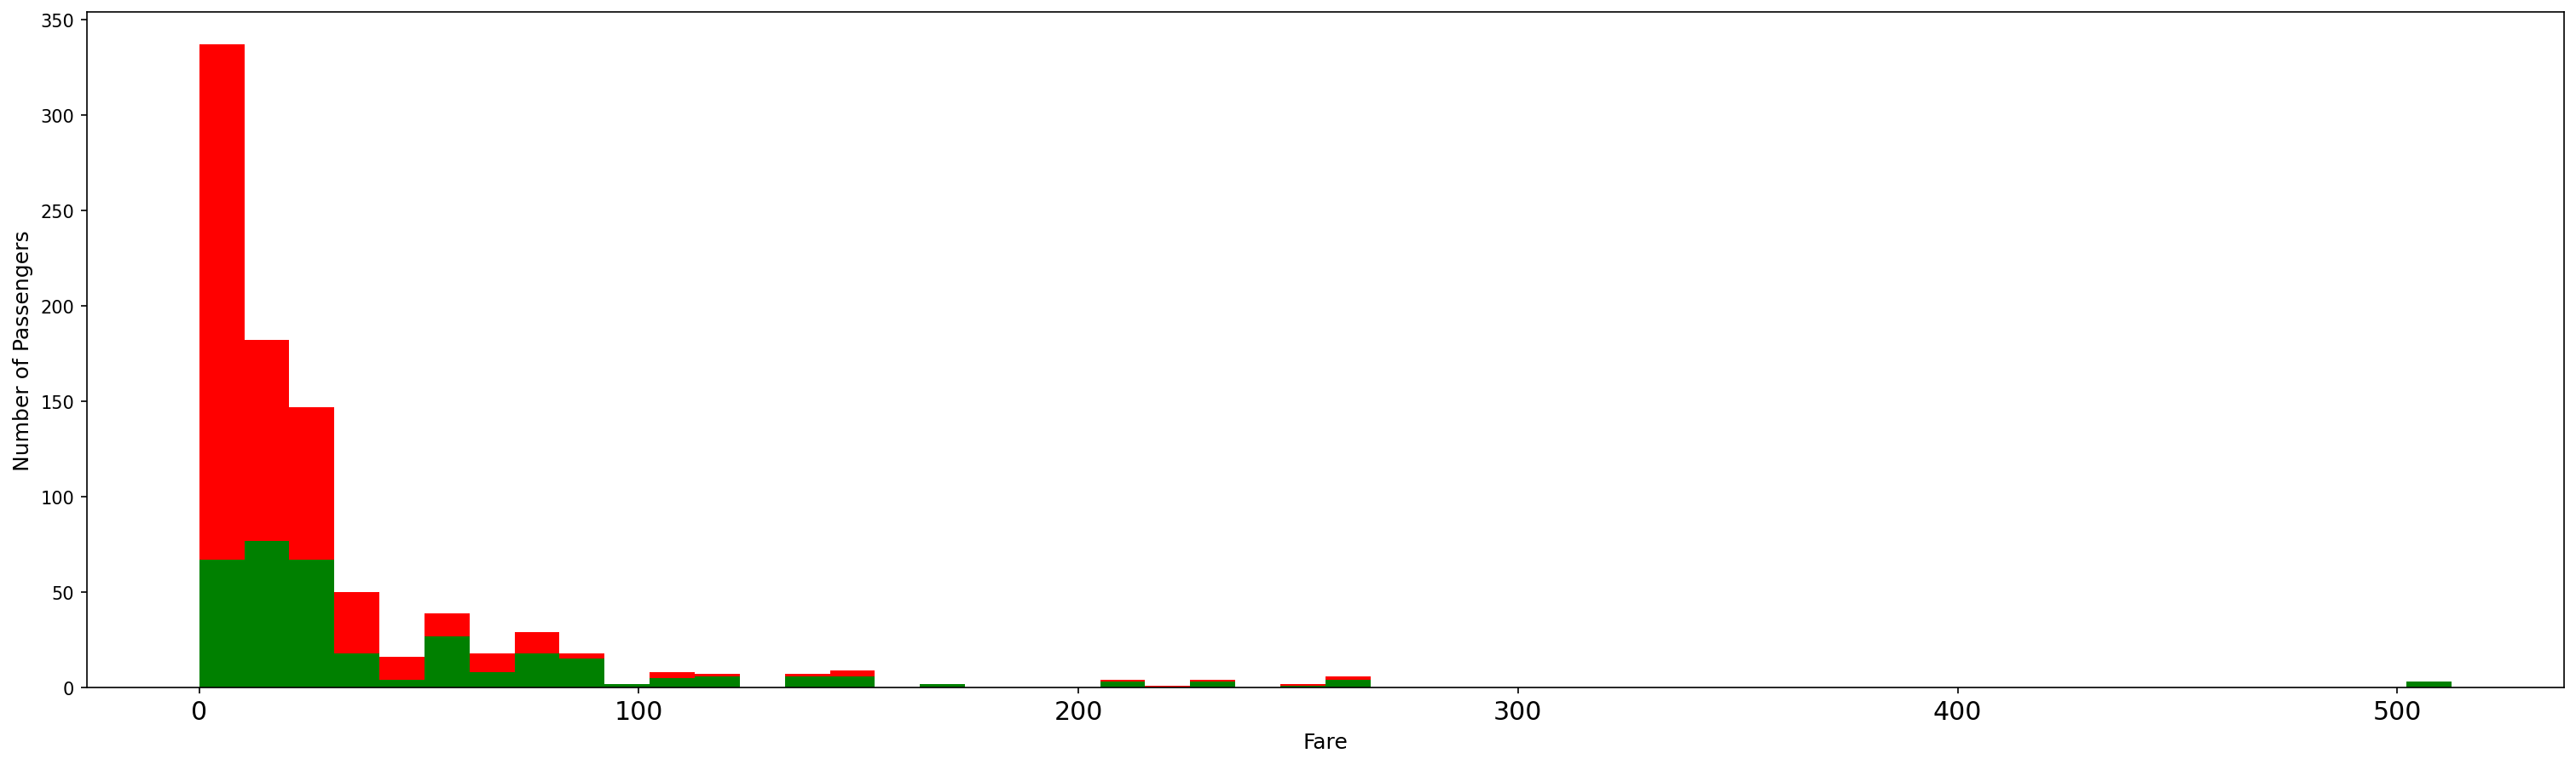

In [91]:
figure =plt.figure(figsize=(25,7))
plt.hist([data[data['Survived']==1]['Fare'], data[data['Survived']==0]['Fare']], stacked=True,color=['g','r'],bins=50,
         label=['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')

#### Let's now combine the age, the fare and the survival on a single chart.

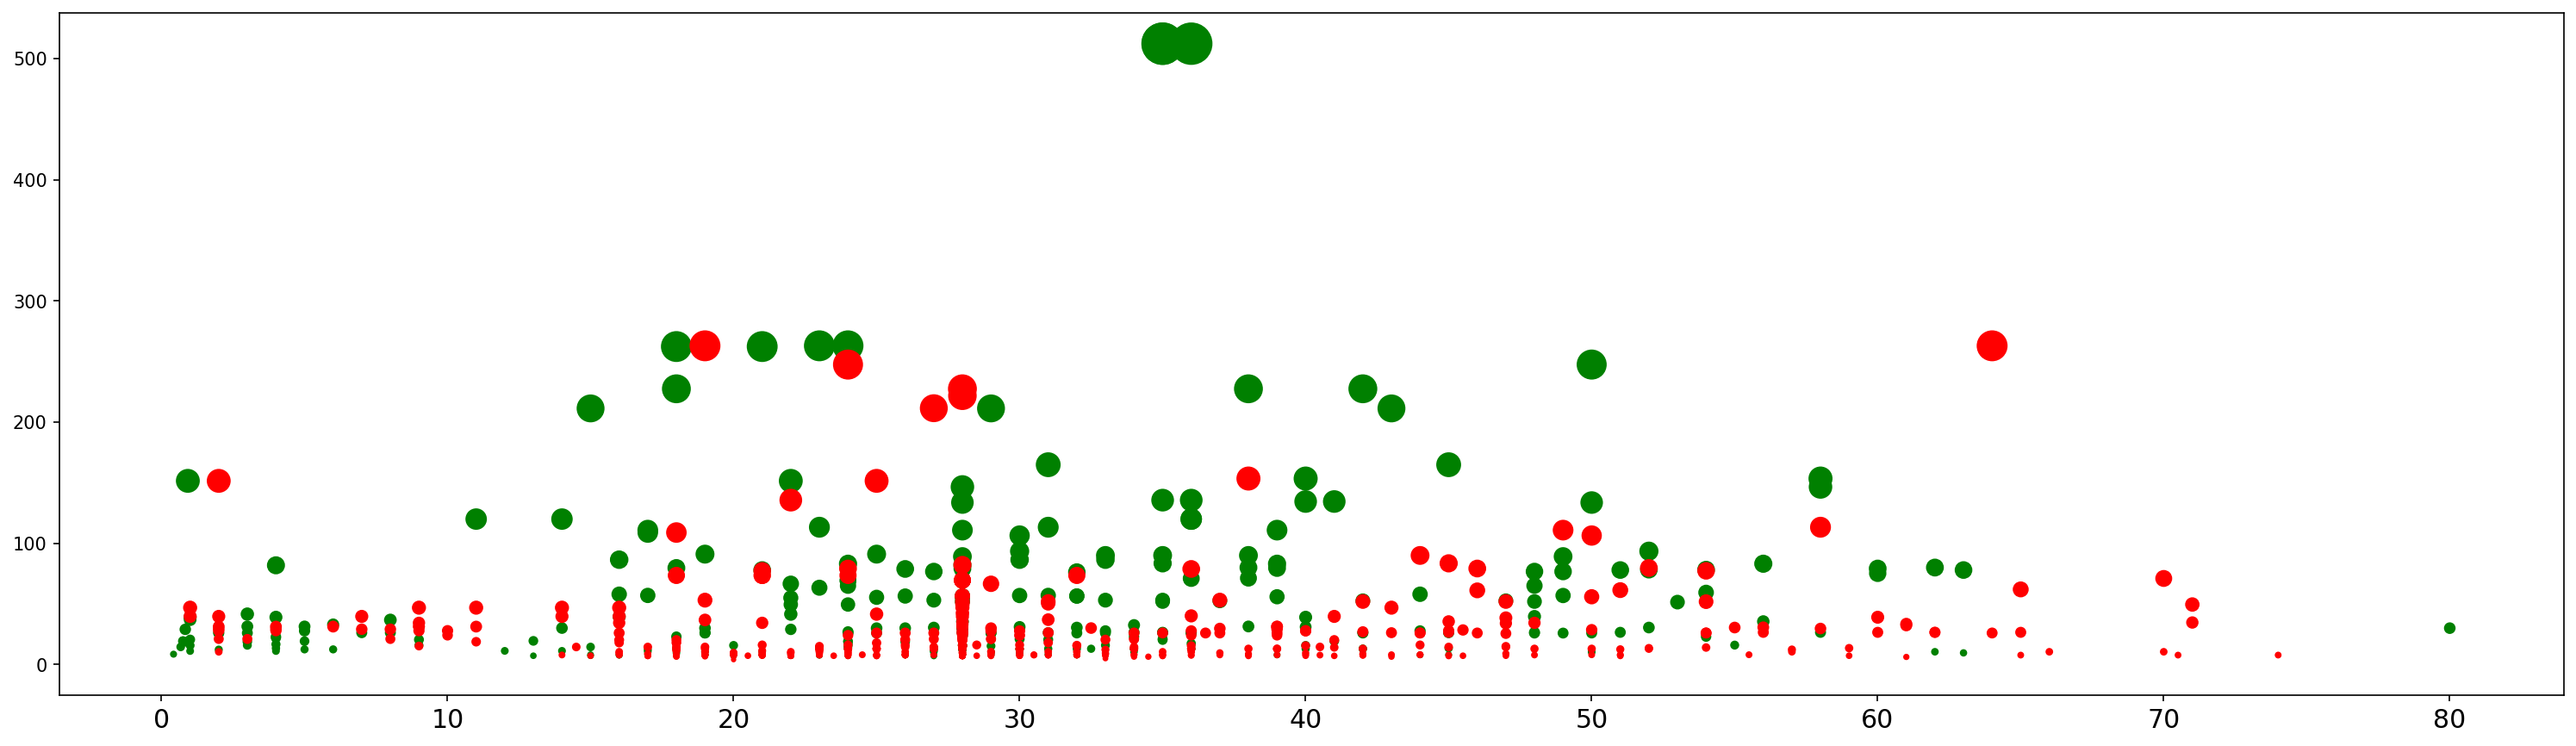

In [92]:
plt.figure(figsize=(25,7))
ax=plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'], data[data['Survived']==1]['Fare'],c='green',s=data[data['Survived']==1]['Fare'])
ax.scatter(data[data['Survived']==0]['Age'], data[data['Survived']==0]['Fare'],c='red',s=data[data['Survived']==0]['Fare'])

#### the ticket fare correlates with the class as we see it in the chart below.

<AxesSubplot:xlabel='Pclass', ylabel='Average Fare'>

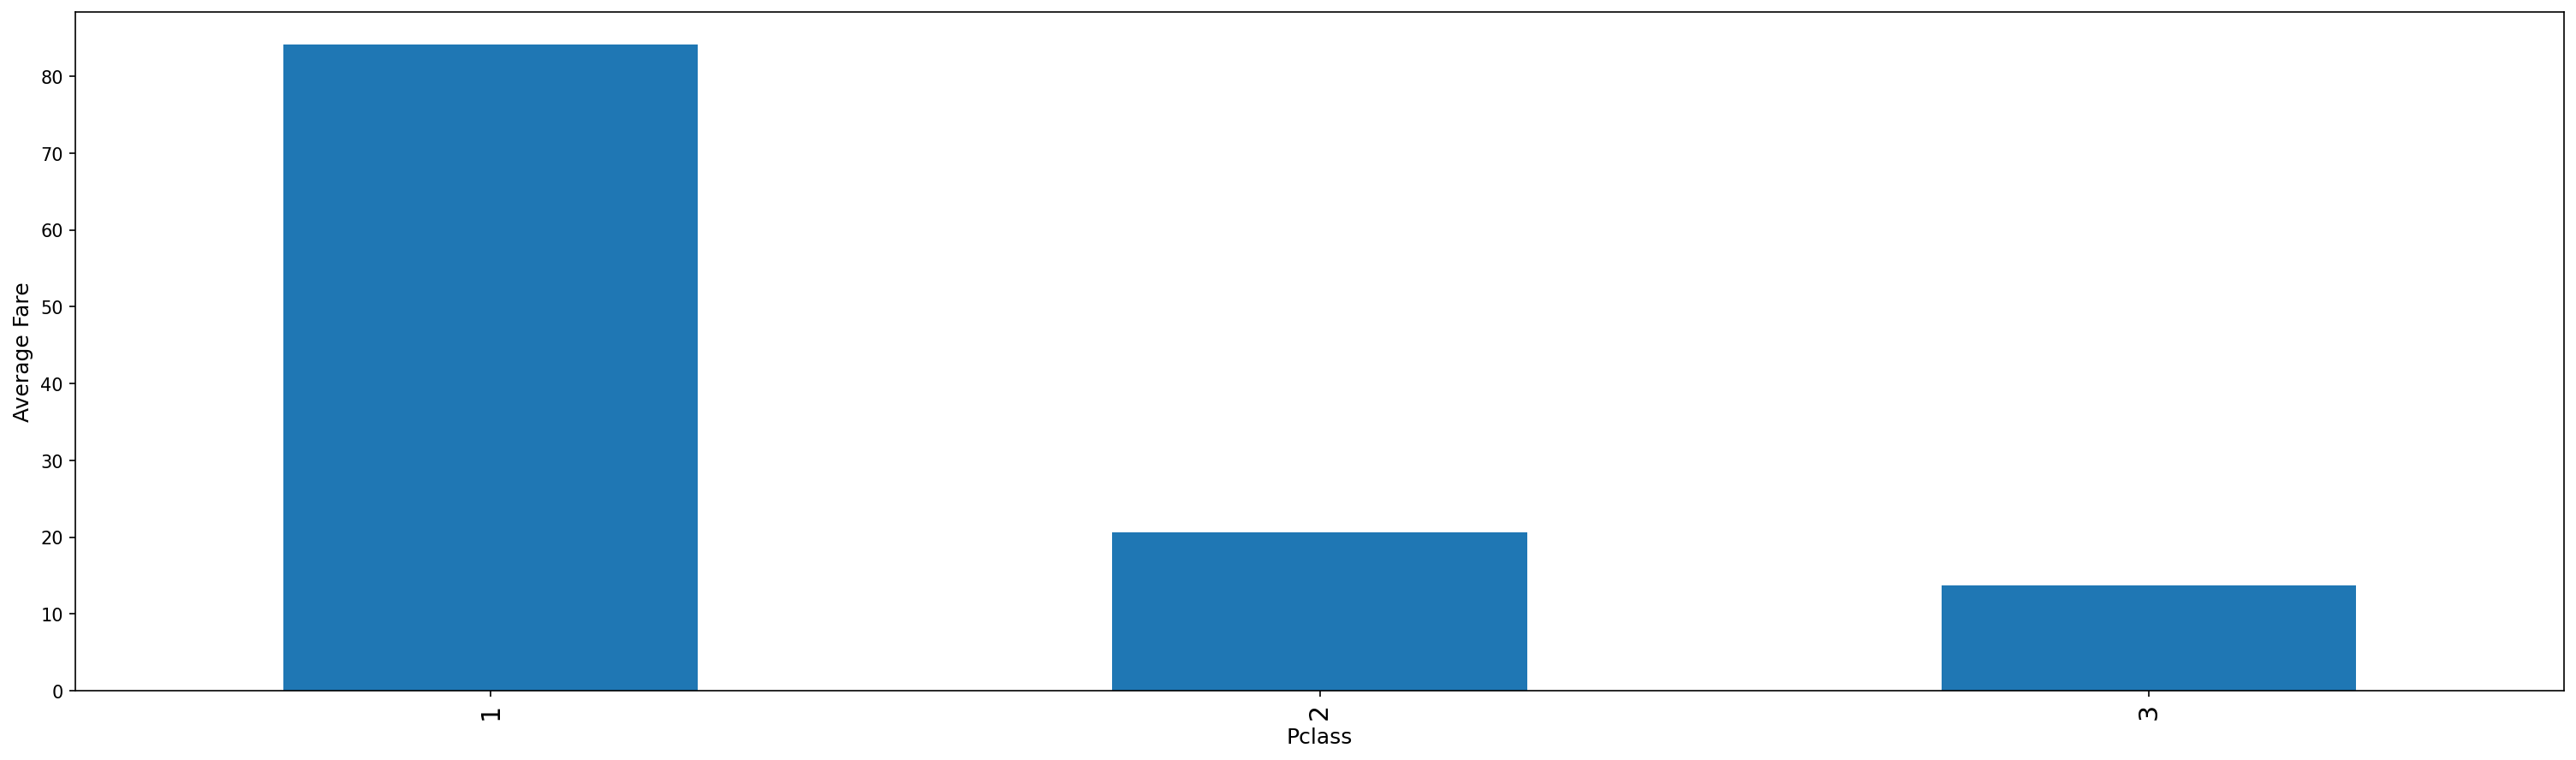

In [93]:
ax=plt.subplot()
ax.set_ylabel('Average Fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(25,7),ax=ax)

#### now see how the embarkation site affects the survival.

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

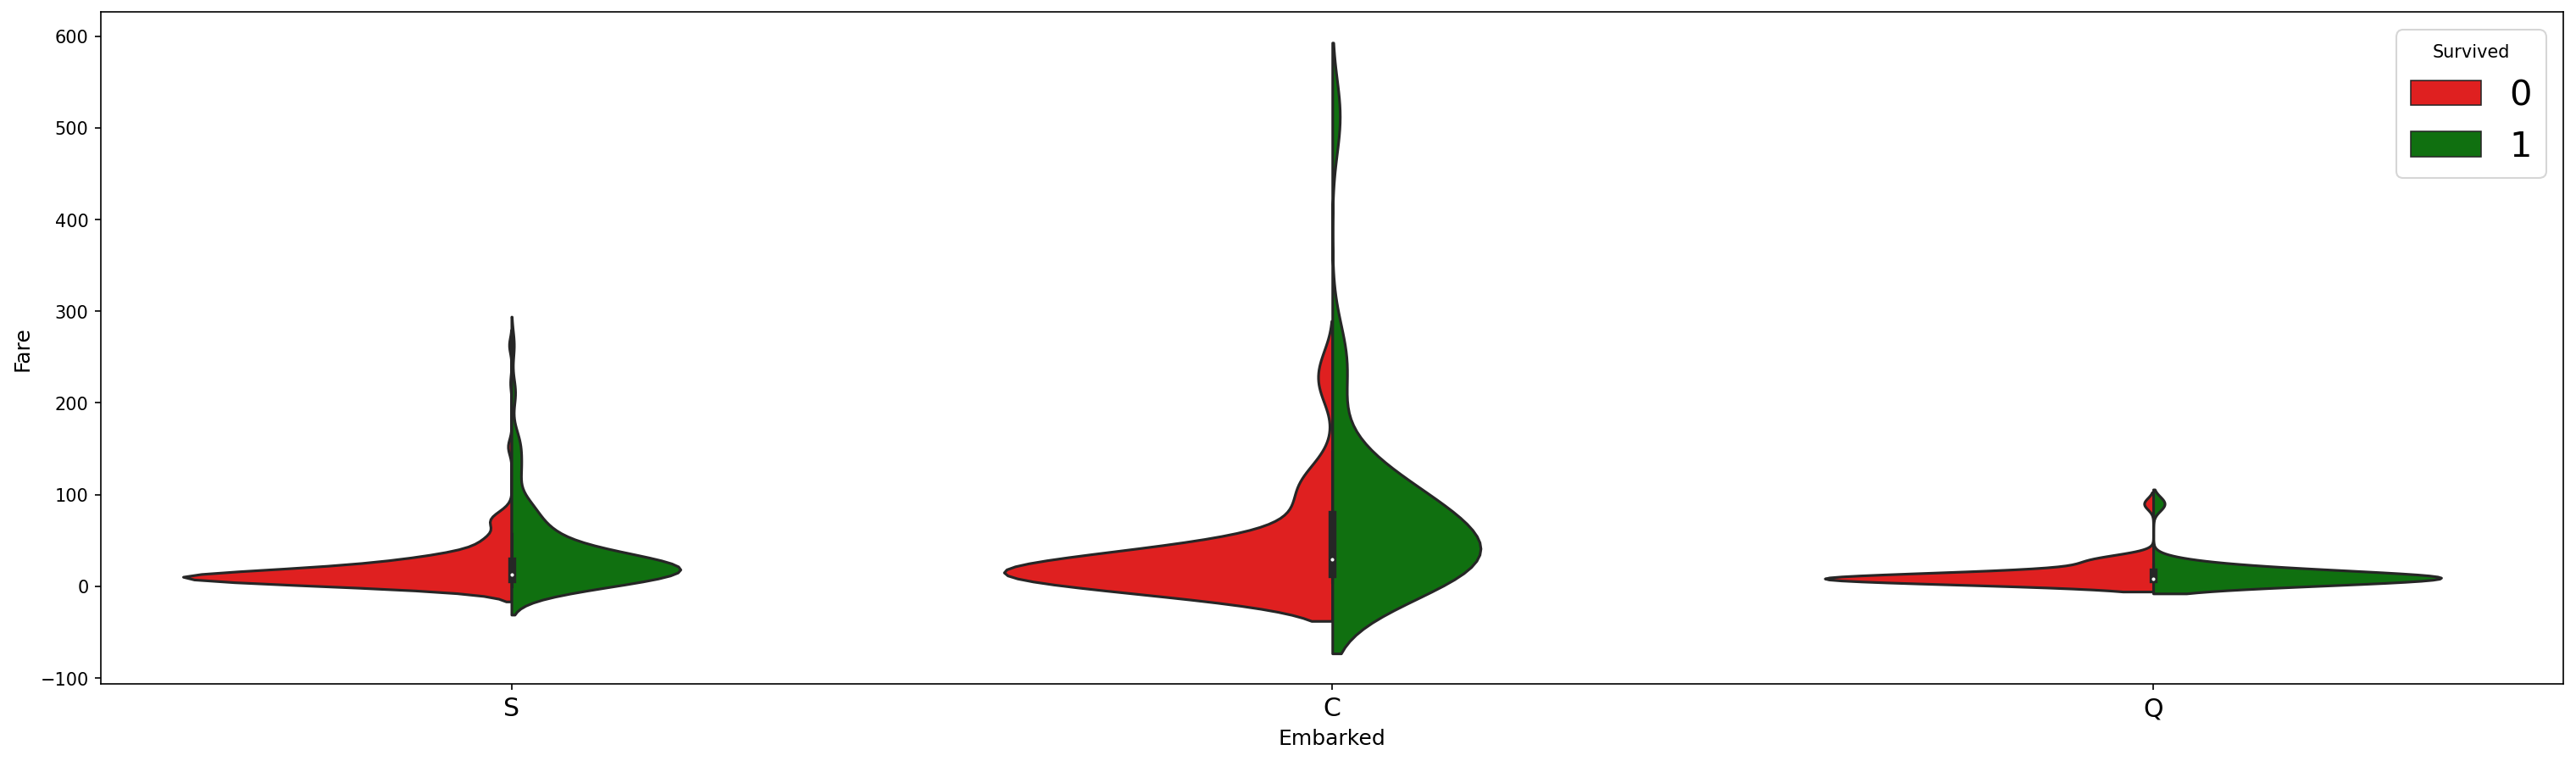

In [94]:
fig=plt.figure(figsize=(25,7))
sns.violinplot(x='Embarked',y='Fare',hue='Survived',data=data ,split=True, palette={0:"r",1:"g"})